# Clusterização com K-Means

Explorar padrões nos dados relacionados a crimes e pontuações de bairros.
O data set analisado é o `Chicago Crime Processed` , que contém informações sobre crimes em diferentes bairros de Chicago-EUA. O objetivo é identificar padrões ou agrupamentos naturais nos dados para entender melhor as características dos bairros em relação aos crimes.


In [1]:
import pandas as pd
import numpy as np
import io
import os
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
df = pd.read_csv('/content/crime-clean.csv')
df

,Crime Type,Latitude,Longitude,Neighborhood,Zip Code,Crime Score,Neigh Score,CSperCapita,Year,Month
0,BATTERY,41.815117,-87.670000,New City,60609.0,0.1118,8304.3985,0.184415,2015.0,9.0
1,THEFT,41.803227,-87.658360,New City,60609.0,0.0676,8304.3985,0.184415,2015.0,9.0
2,THEFT,41.800729,-87.667199,New City,60609.0,0.0679,8304.3985,0.184415,2015.0,9.0
3,PUBLIC PEACE VIOLATION,41.796919,-87.662233,New City,60609.0,0.0040,8304.3985,0.184415,2015.0,9.0
4,BURGLARY,41.800627,-87.670846,New City,60609.0,0.0959,8304.3985,0.184415,2015.0,9.0
...,...,...,...,...,...,...,...,...,...,...
361883,NARCOTICS,41.916879,-87.750191,Belmont Cragin,60639.0,0.0000,5773.9949,0.088077,2010.0,1.0
361884,OTHER OFFENSE,41.926496,-87.763619,Belmont Cragin,60639.0,0.0000,5773.9949,0.088077,2010.0,1.0
361885,THEFT,41.925949,-87.757380,Belmont Cragin,60639.0,0.0000,5773.9949,0.088077,2010.0,1.0
361886,THEFT,41.919332,-87.784094,Belmont Cragin,60639.0,0.0000,5773.9949,0.088077,2010.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361888 entries, 0 to 361887
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Crime Type    361888 non-null  object 
 1   Latitude      361888 non-null  float64
 2   Longitude     361887 non-null  float64
 3   Neighborhood  361887 non-null  object 
 4   Zip Code      361887 non-null  float64
 5   Crime Score   361887 non-null  float64
 6   Neigh Score   361887 non-null  float64
 7   CSperCapita   361887 non-null  float64
 8   Year          361887 non-null  float64
 9   Month         361887 non-null  float64
dtypes: float64(8), object(2)
memory usage: 27.6+ MB


In [5]:
print(df[df.isnull().any(axis=1)].to_string(index=False))

Crime Type  Latitude  Longitude Neighborhood  Zip Code  Crime Score  Neigh Score  CSperCapita  Year  Month
   BATTERY 41.929557        NaN          NaN       NaN          NaN          NaN          NaN   NaN    NaN


In [6]:
df.dropna(inplace=True)
print(df[df.isnull().any(axis=1)].to_string(index=False))

Empty DataFrame
Columns: [Crime Type, Latitude, Longitude, Neighborhood, Zip Code, Crime Score, Neigh Score, CSperCapita, Year, Month]
Index: []


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361887 entries, 0 to 361886
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Crime Type    361887 non-null  object 
 1   Latitude      361887 non-null  float64
 2   Longitude     361887 non-null  float64
 3   Neighborhood  361887 non-null  object 
 4   Zip Code      361887 non-null  float64
 5   Crime Score   361887 non-null  float64
 6   Neigh Score   361887 non-null  float64
 7   CSperCapita   361887 non-null  float64
 8   Year          361887 non-null  float64
 9   Month         361887 non-null  float64
dtypes: float64(8), object(2)
memory usage: 30.4+ MB


In [8]:
for cols in df.select_dtypes(include=['object']).columns:
    print(cols)
    print(
        np.unique(df[cols],
                  return_counts=True)
    )

Crime Type
(array(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
       'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'NON - CRIMINAL', 'NON-CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
       'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'ROBBERY', 'SEX OFFENSE', 'STALKING',
       'THEFT', 'WEAPONS VIOLATION'], dtype=object), array([  790, 25613, 74259, 15750,    38,  1475, 34861,   264,  7098,
       12873,  1179,  1060,     9,  2216,   181,   243,   359, 15720,
       56886,     3,    11,     3,    49,  3040,     5, 22397,  4172,
          10,  2990, 15677,

In [10]:
dados = df.drop(['Latitude', 'Longitude'], axis=1)
dados

,Crime Type,Neighborhood,Zip Code,Crime Score,Neigh Score,CSperCapita,Year,Month
0,BATTERY,New City,60609.0,0.1118,8304.3985,0.184415,2015.0,9.0
1,THEFT,New City,60609.0,0.0676,8304.3985,0.184415,2015.0,9.0
2,THEFT,New City,60609.0,0.0679,8304.3985,0.184415,2015.0,9.0
3,PUBLIC PEACE VIOLATION,New City,60609.0,0.0040,8304.3985,0.184415,2015.0,9.0
4,BURGLARY,New City,60609.0,0.0959,8304.3985,0.184415,2015.0,9.0
...,...,...,...,...,...,...,...,...
361882,THEFT,Belmont Cragin,60639.0,0.0000,5773.9949,0.088077,2010.0,1.0
361883,NARCOTICS,Belmont Cragin,60639.0,0.0000,5773.9949,0.088077,2010.0,1.0
361884,OTHER OFFENSE,Belmont Cragin,60639.0,0.0000,5773.9949,0.088077,2010.0,1.0
361885,THEFT,Belmont Cragin,60639.0,0.0000,5773.9949,0.088077,2010.0,1.0


In [11]:
df_dummyfied = pd.get_dummies(dados)
df_dummyfied

,Zip Code,Crime Score,Neigh Score,CSperCapita,Year,Month,Crime Type_ARSON,Crime Type_ASSAULT,Crime Type_BATTERY,Crime Type_BURGLARY,...,Neighborhood_Douglas,Neighborhood_Englewood,Neighborhood_Fuller Park,Neighborhood_Gage Park,Neighborhood_Garfield Park,Neighborhood_Grand Boulevard,Neighborhood_Humboldt Park,Neighborhood_Mckinley Park,Neighborhood_New City,Neighborhood_Washington Park
0,60609.0,0.1118,8304.3985,0.184415,2015.0,9.0,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,60609.0,0.0676,8304.3985,0.184415,2015.0,9.0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,60609.0,0.0679,8304.3985,0.184415,2015.0,9.0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,60609.0,0.0040,8304.3985,0.184415,2015.0,9.0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,60609.0,0.0959,8304.3985,0.184415,2015.0,9.0,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361882,60639.0,0.0000,5773.9949,0.088077,2010.0,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
361883,60639.0,0.0000,5773.9949,0.088077,2010.0,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
361884,60639.0,0.0000,5773.9949,0.088077,2010.0,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
361885,60639.0,0.0000,5773.9949,0.088077,2010.0,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Método do Cotovelo

Para definir a quantidade de clusters ideal, utilizamos Método do Cotovelo (Elbow Method). Ele envolve ajustar o modelo para diferentes valores de k e plotar a variação da inércia (ou a soma dos quadrados intra-cluster) em relação ao número de clusters. O ponto em que a variação começa a se nivelar é chamado de "cotovelo", e esse é frequentemente considerado um bom valor para k.

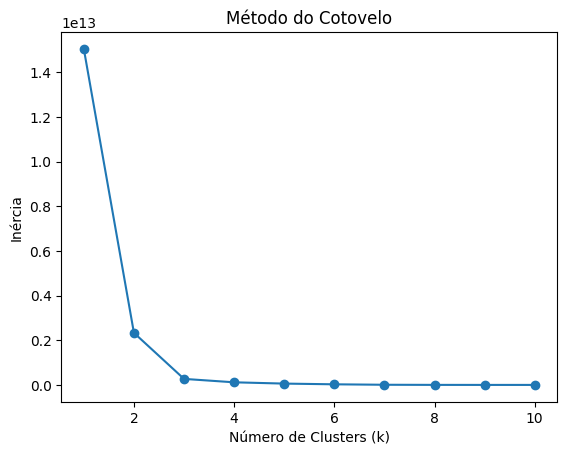

In [12]:

k_values = range(1, 11)
inercias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_dummyfied)
    inercias.append(kmeans.inertia_)

plt.plot(k_values, inercias, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.show()


# Aplicação do Algoritmo K-Means

Agrupar bairros semelhantes com base nas características selecionadas.
Selecionamos características específicas para a análise, incluindo 'Crime Score', 'Neigh Score' e 'CSperCapita'. Essas características representam pontuações relacionadas a crimes, pontuação do bairro e crimes per capita, respectivamente.
Para garantir que todas as características tenham a mesma escala, aplicamos a padronização usando o StandardScaler. Isso é importante porque algoritmos baseados em distância, como o K-Means, podem ser sensíveis a escalas diferentes.

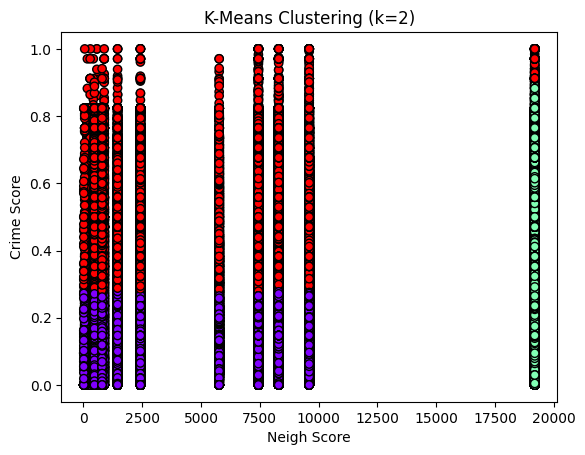

In [14]:
caracteristicas_cluster = df_dummyfied[['Crime Score', 'Neigh Score', 'CSperCapita']]

# Padronizar as características para garantir que todas tenham a mesma escala
scaler = StandardScaler()
caracteristicas_cluster_padronizadas = scaler.fit_transform(caracteristicas_cluster)

# Criar o modelo K-Means com k=3
modelo_kmeans = KMeans(n_clusters=3, random_state=42)

# Ajustar o modelo às características padronizadas
modelo_kmeans.fit(caracteristicas_cluster_padronizadas)

# Adicionar rótulos de clusters ao DataFrame original
df_dummyfied['Cluster'] = modelo_kmeans.labels_

# Visualizar os clusters
plt.scatter(df_dummyfied['Neigh Score'], df_dummyfied['Crime Score'], c=df_dummyfied['Cluster'], cmap='rainbow', edgecolor='k')
plt.title('K-Means Clustering (k=2)')
plt.xlabel('Neigh Score')
plt.ylabel('Crime Score')
plt.show()


# Resultados Preliminares

Os clusters identificados nos ajudam a entender como os bairros se agrupam em relação às características de crimes. Isso pode fornecer insights sobre padrões socioeconômicos ou de segurança em diferentes regiões.

Próximos Passos:
Os resultados preliminares podem orientar análises mais detalhadas em cada cluster. Podemos explorar características específicas de cada grupo para obter uma compreensão mais profunda dos fatores que contribuem para os diferentes padrões de crimes nos bairros.

Esta análise é um ponto de partida, e a interpretação dos clusters deve ser feita considerando o contexto específico dos dados e do problema em questão. A partir daqui, podemos continuar refinando a análise com base nas descobertas e nas perguntas específicas que desejamos responder.

